# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [2]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
# Open a dataset from your project folder in Google Drive
data = pd.read_csv('wprdc_stop_data.csv')

In [6]:
data.head()

,clever_id,stop_id,stop_name,direction,routes_ser,latitude,longitude,mode,shelter,stop_type,datekey,time_period,route_name,serviceday,total_ons,total_offs,days,avg_ons,avg_offs
0,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Sat,12.0,0.0,4,3.000000,0.00
1,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Sun,14.0,0.0,6,2.333333,0.00
2,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Weekday,64.0,1.0,20,3.200000,0.05
3,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,P69,Weekday,39.0,0.0,20,1.950000,0.00
4,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,69,Sat,11.0,0.0,4,2.750000,0.00


In [7]:
# replace Sat and Sun in serviceday
data['serviceday'] = data['serviceday'].replace('Sat', 'Weekend').replace('Sun', 'Weekend')

# binary variable
data['weekend'] = np.where(data['serviceday'] == 'Weekend', 1, 0)

In [8]:
# ave_ons = b_0 + b_1 weekend

## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [ ]:
# Data operations here

In [ ]:
# Save your dataset after you've worked on it
#data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

In [ ]:
# Exploratory Data Analysis here

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

<Axes: xlabel='serviceday', ylabel='avg_ons'>

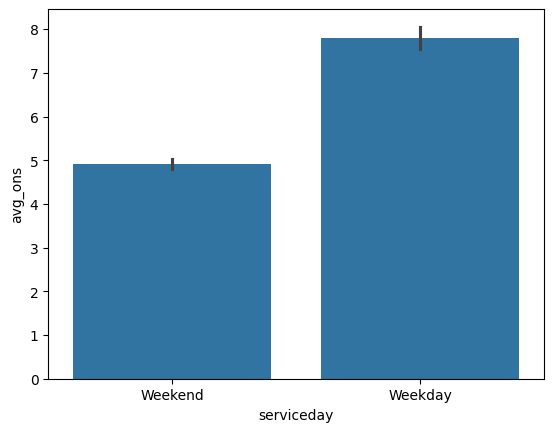

In [9]:
sns.barplot(data=data, x='serviceday', y='avg_ons')

In [10]:
data['logons'] = np.log(data['avg_ons']+1)

Text(0.5, 0, 'average ons')

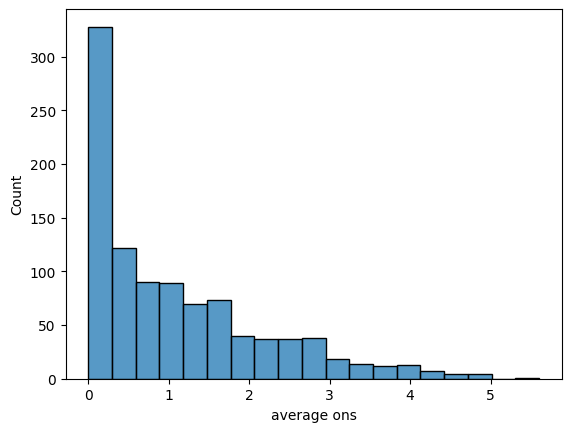

In [13]:
sns.histplot(data.sample(1000), x='logons')
plt.xlabel('average ons')

Text(0.5, 1.0, 'Distribution of Average Ons for Weekdays')

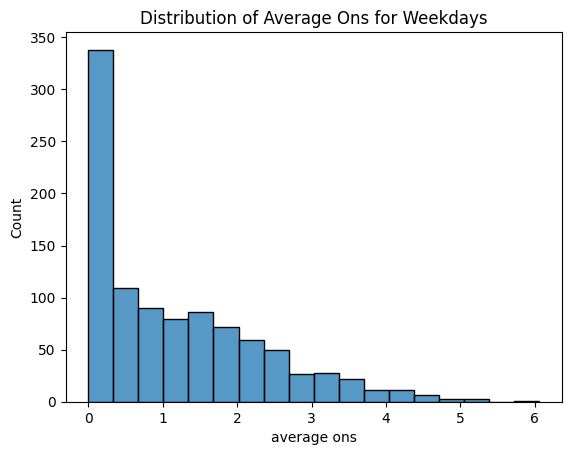

In [18]:
#Histogram for Weekday
sns.histplot(data[data['weekend'] == 0].sample(1000), x='logons')
plt.xlabel('average ons')
plt.title('Distribution of Average Ons for Weekdays')

Text(0.5, 1.0, 'Distribution of Average Ons for Weekends')

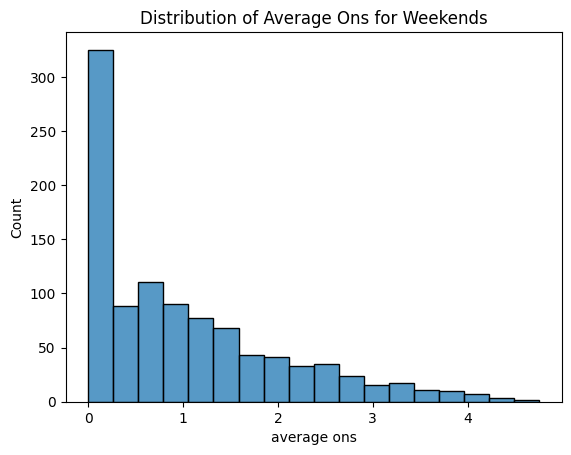

In [19]:
#Histogram for Weekend
sns.histplot(data[data['weekend'] == 1].sample(1000), x='logons')
plt.xlabel('average ons')
plt.title('Distribution of Average Ons for Weekends')

Text(0.5, 0, 'service day')

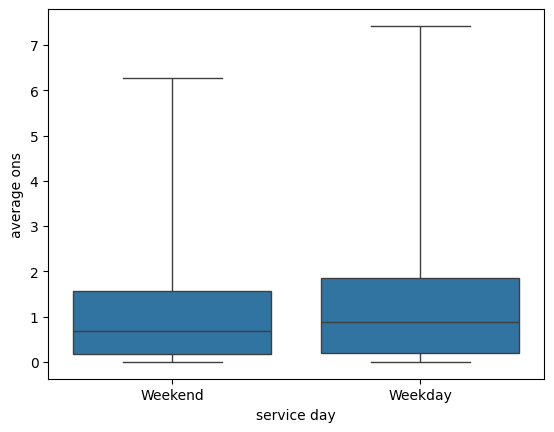

In [12]:
sns.boxplot(data=data, x='serviceday', y='logons', whis=(0,100))

plt.xticks([0,1], labels=['Weekend', 'Weekday'])
plt.ylabel('average ons')
plt.xlabel('service day')

In [13]:
model_1 = smf.ols('logons ~ serviceday', data=data).fit()
print(model_1.summary().tables[1])


                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.1928      0.005    233.775      0.000       1.183       1.203
serviceday[T.Weekend]    -0.1891      0.007    -28.084      0.000      -0.202      -0.176


Text(0.5, 0, 'service day')

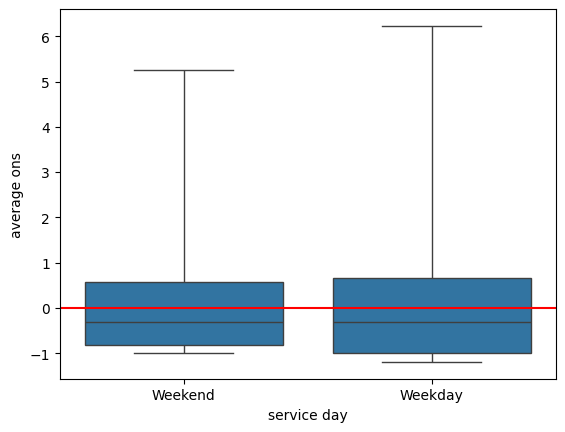

In [14]:
sns.boxplot(x=model_1.predict(), y=model_1.resid, whis=(0,100))
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks([0,1], labels=['Weekend', 'Weekday'])
plt.ylabel('average ons')
plt.xlabel('service day')